In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [8]:
heir_raw = pd.read_parquet('data/processed/postprocessed_after_outlier_handled.parquet')
df_y_actual = pd.read_parquet('data/processed/postprocessed_after_outlier_handled_actual.parquet')

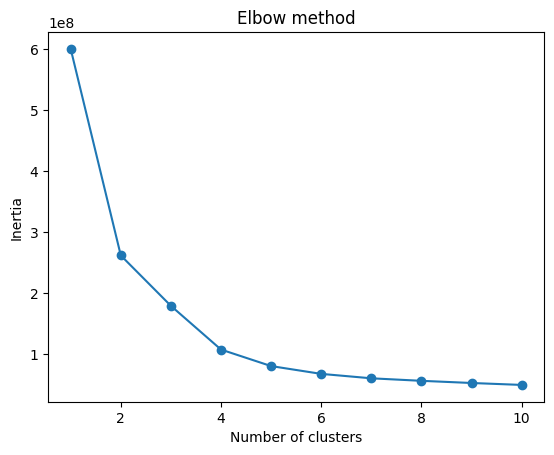

In [10]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(heir_raw)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

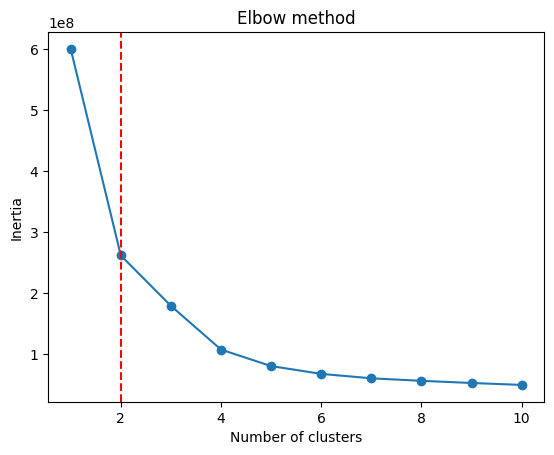

In [11]:
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
# plt.show()
plt.axvline(x=2, color='r', linestyle='--')

In [12]:
inertias

[600920674.889978,
 261724522.96493328,
 178975117.58019653,
 107162322.18167044,
 80036985.47874793,
 67225249.07421803,
 59957846.416477874,
 55828673.66945255,
 52262063.94352652,
 49090623.01718709]

In [13]:
selected_kmeans = KMeans(n_clusters=2)
selected_kmeans.fit(heir_raw)

KMeans(n_clusters=2)

In [14]:
selected_kmeans.labels_

array([0, 1, 0, ..., 1, 0, 0])

In [15]:
y_labels = pd.DataFrame({'pred': selected_kmeans.labels_})

In [16]:
y_labels

,pred
0,0
1,1
2,0
3,0
4,1
...,...
67186,1
67187,0
67188,1
67189,0


In [17]:
df_results = pd.concat([y_labels, df_y_actual], axis=1, join="inner")

In [18]:
df_results

,pred,actual
0,0,0
1,1,0
2,0,0
3,0,1
4,1,1
...,...,...
67186,1,1
67187,0,0
67188,1,0
67189,0,1


In [19]:
df_filtered = df_results

In [20]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [21]:
predicted = df_filtered['pred']
actual = df_filtered['actual']

In [22]:
# accuracy
accuracy = accuracy_score(actual, predicted)

# precision
precision = precision_score(actual, predicted, average='weighted')

# recall
recall = recall_score(actual, predicted, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.5076721584736051
Precision: 0.5076563347665877
Recall: 0.5076721584736051


In [23]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(heir_raw, predicted)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.49573680656875685


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(heir_raw)
numped_arry = predicted.to_numpy()

In [27]:
numped_arry

array([0, 1, 0, ..., 1, 0, 0])

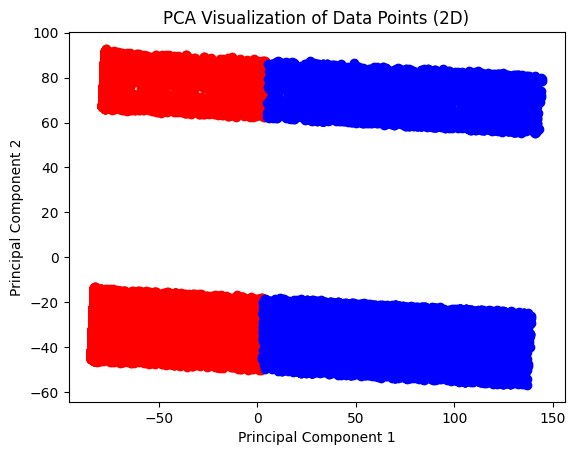

In [28]:
plt.scatter(reduced_data[numped_arry == 0, 0], reduced_data[numped_arry == 0, 1], color='red', label='Class 0')
plt.scatter(reduced_data[numped_arry == 1, 0], reduced_data[numped_arry == 1, 1], color='blue', label='Class 1')
plt.title('PCA Visualization of Data Points (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [29]:
from sklearn.metrics import rand_score, adjusted_rand_score

RI = rand_score(actual, predicted)
ARI = adjusted_rand_score(actual, predicted)

In [30]:
RI

0.5001102841998256